In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [71]:
dfx=pd.read_csv("X.csv")
dfy=pd.read_csv("Y.csv")

<IPython.core.display.Javascript object>


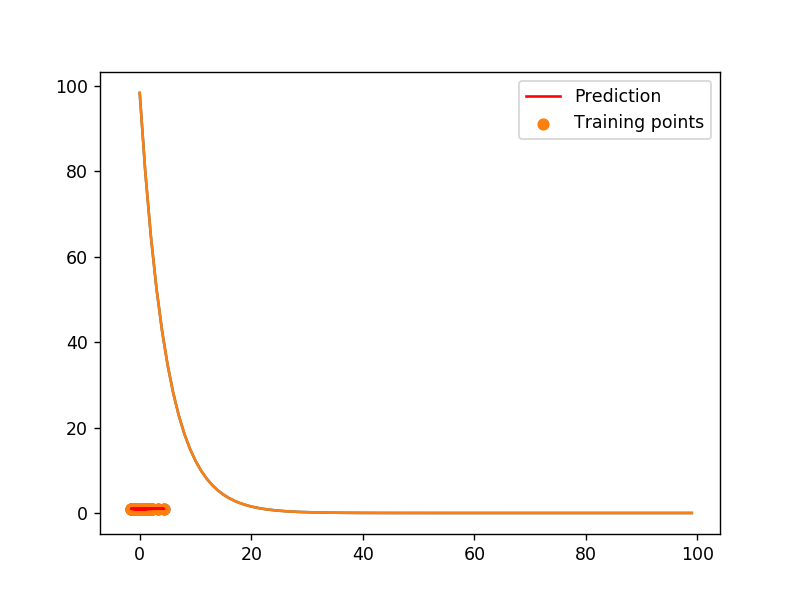

In [72]:
x=dfx.values
y=dfy.values
X=((x-x.mean())/x.std())   #Normalisation
Y=y
plt.scatter(X,Y)

In [73]:

#Driver Code
def hypothesis(x,theta):
    return(theta[0]+theta[1]*x)         #creating hypothesis according to the rule

def error(X,Y,theta):
    m=X.shape[0]                 #counting the total number of training sets.
    error=0                   #defining error
    for i in range(m):
        hx=hypothesis(X[i],theta)             #creating h(x) for different x acc to the rule
        error+=(hx-Y[i])**2             #calculating error
        
    return(error)

def gradient(X,Y,theta):
    grad=np.zeros((2,))         #creating a gradient array of size two as we have to calculate gradient for theta[0] and theta[1]
    m=X.shape[0]
    for i in range(m):
        hx=hypothesis(X[i],theta)
        grad[0]+=(hx-Y[i])                #updating the value of gradient as per the formula
        grad[1]+=(hx-Y[i])*X[i]
    return(grad)

#Main Algorithm

def gradient_Descent(X,Y,learning_rate=0.001):
    theta=np.zeros((2,))                #creating theta vector and intializing them with zero
    error_list=[]
    theta_list=[]
    for i in range(100):             #taking 100 as maximum iteration for convergence       
        grad=gradient(X,Y,theta)     #evaulating gradient
        e=error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        theta[0]=theta[0]-learning_rate*grad[0]   #updating the values of theta according to the formula
        theta[1]=theta[1]-learning_rate*grad[1]
    
    return(theta,error_list,theta_list)


In [74]:
final_theta,error_list,theta_list=gradient_Descent(X,Y)

In [75]:
plt.plot(error_list)
error_list=np.array(error_list)
print(error_list.shape)
theta_list=np.array(theta_list)
print(theta_list.shape)

(100, 1)
(100, 2)


In [76]:
plt.plot(error_list)
plt.show()

In [77]:
xtest=np.linspace(-2,6,8)
plt.scatter(X,Y,label="Training points")
plt.plot(X,hypothesis(X,final_theta),color="r",label="Prediction")
plt.legend()
plt.show()

In [78]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


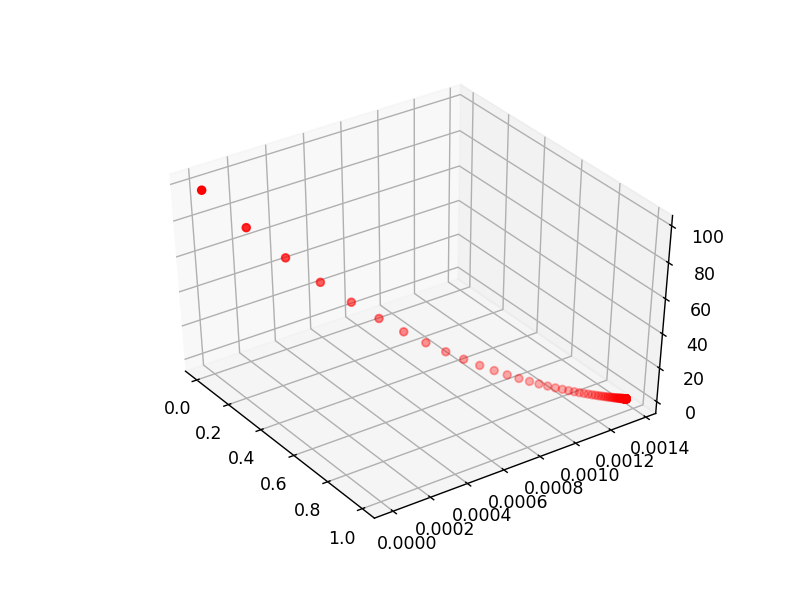

In [81]:
fig=plt.figure()
theta_list=np.array(theta_list)
theta_list.shape
axes=fig.gca(projection='3d')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,color="r")
#axes.plot_surface(theta_list[:,0],theta_list[:,1],error_list,cmap="rainbow")

In [9]:
from sklearn.linear_model import LinearRegression

In [11]:
lr=LinearRegression(normalize=True)    #Creating Object

In [12]:
lr.fit(X,Y) #Training 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [110]:
a=np.array(lr.coef_)

In [123]:
output=lr.predict(X)

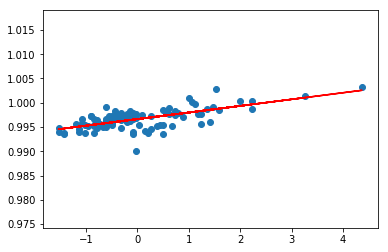

In [124]:
plt.scatter(X,Y)
plt.plot(X,output,c="red")
plt.show()